Imagine you have a mono signal you want to compress.

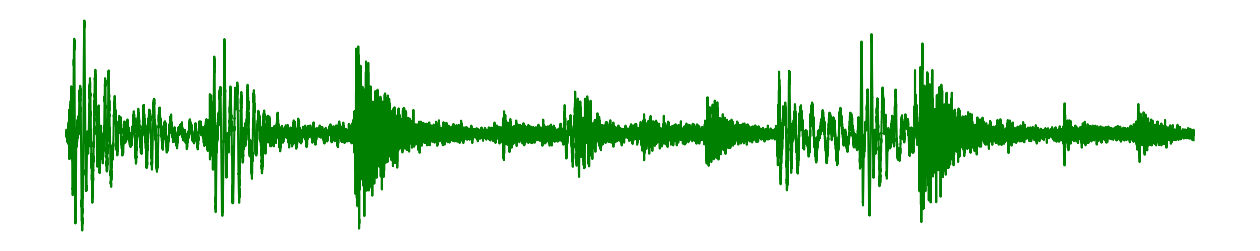</img>

In order to do that, you slice the sample into small, short pieces of a fixed length. In case of longer audio samples, it would be the best if the length of a slice aligns with the BPM.

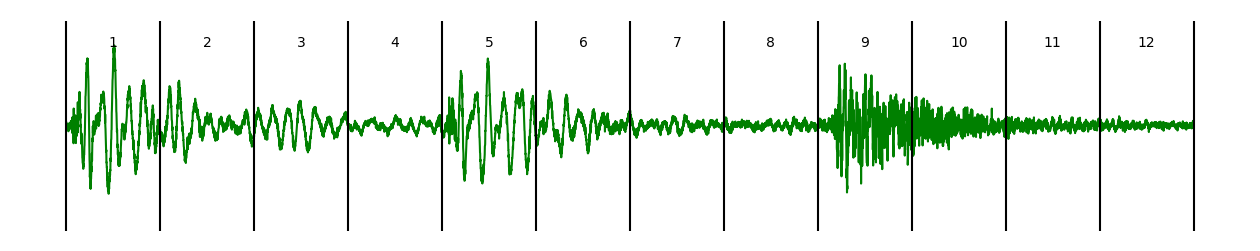</img>

You get a bunch of slices:

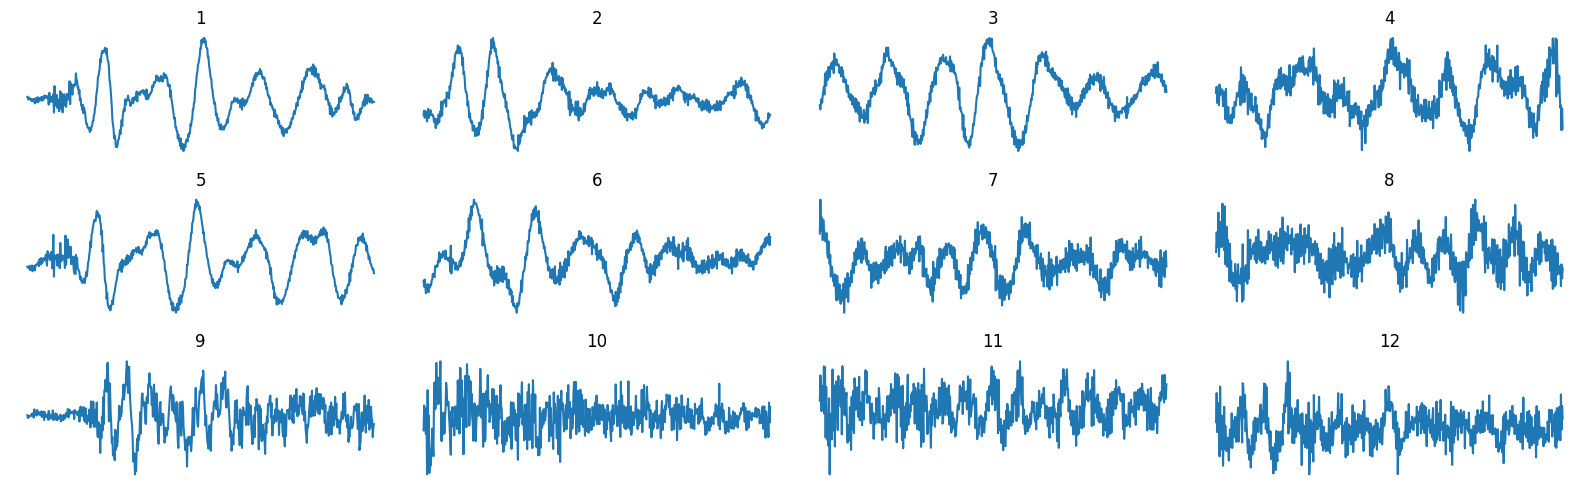</img>

Now, you want to find a *smaller* number of samples that approximate all samples above, let's call it a **basis** of the audio. We are going to represent all samples above using elements only from the basis.

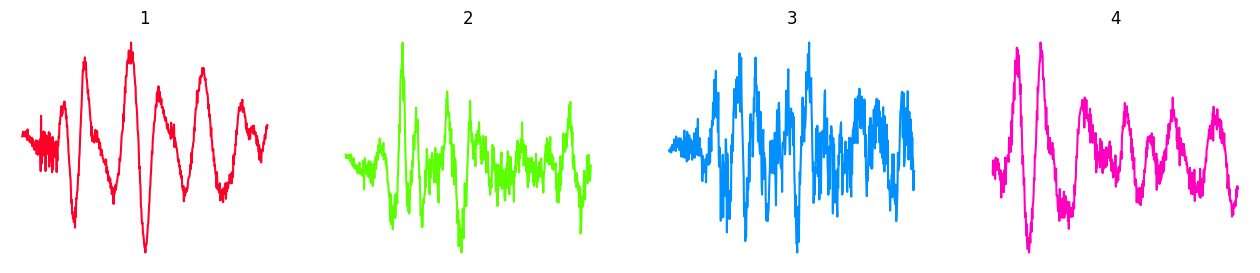</img>

More precisely, by approximation we mean that each original slice is a combination of basis elements, as the image below shows:

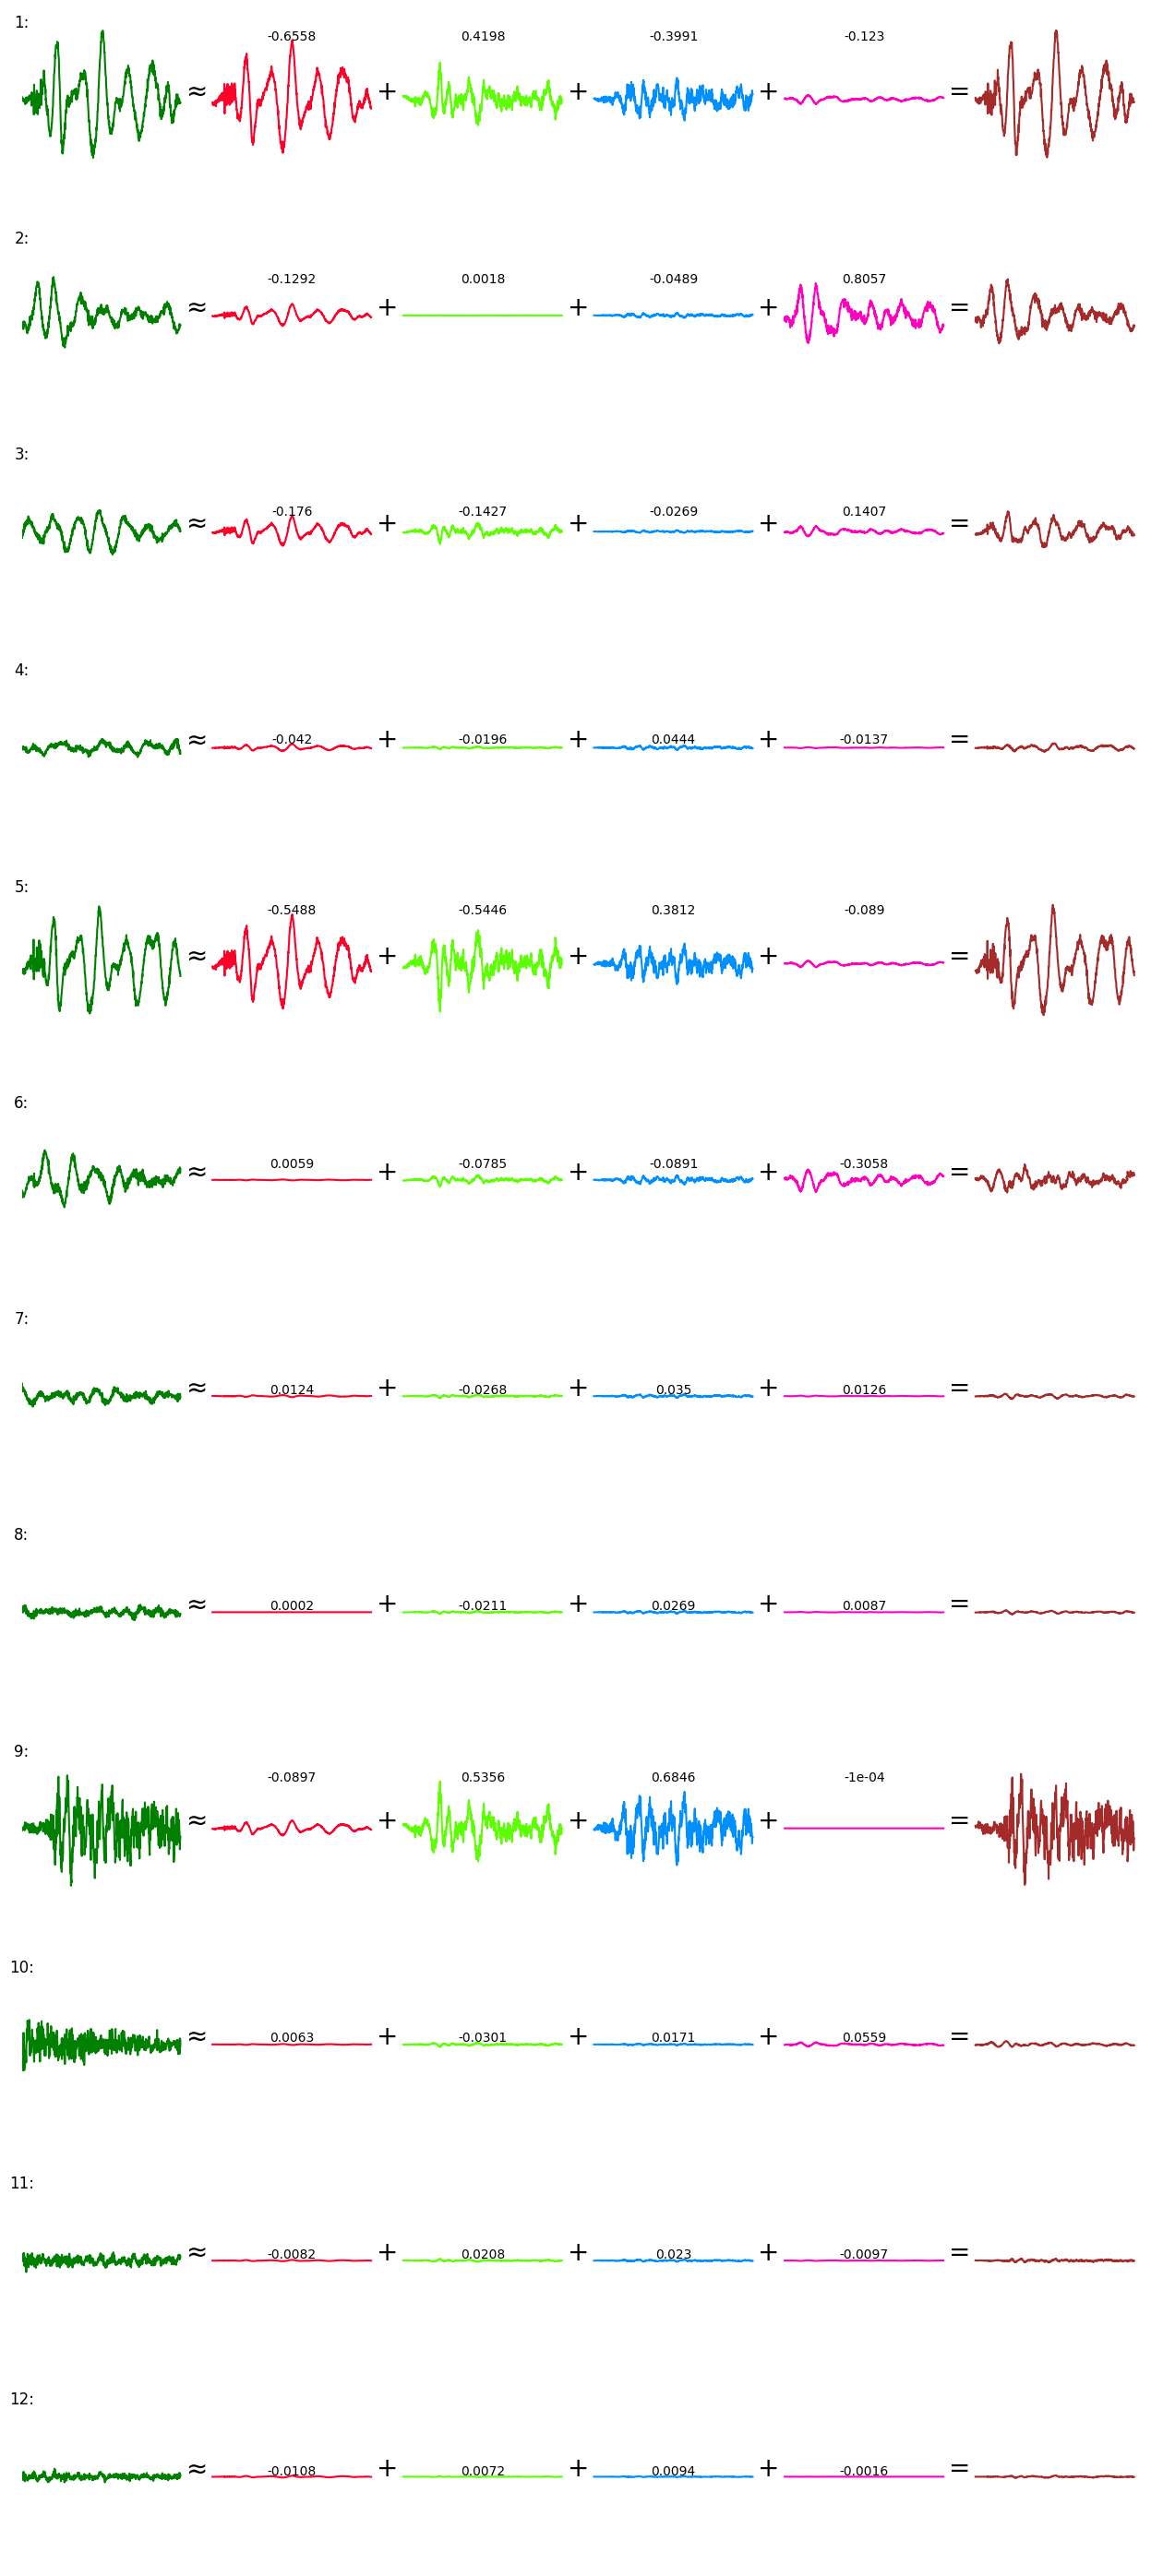</img>

If you have these, you can reassemble your audio by concatenating all calculated samples:

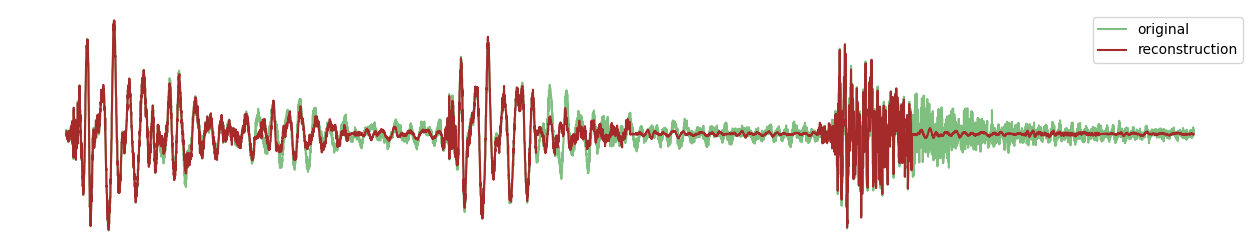</img>

We approximated the original sample using only 4 samples (and the matrix of coefficients). It's not perfect but not bad either.

But how do we get these basic blocks? 

Here comes the math. We use _Singular Value Decomposition_ (SVD) method. We can treat each sample as 1D array of temporal amplitude points:

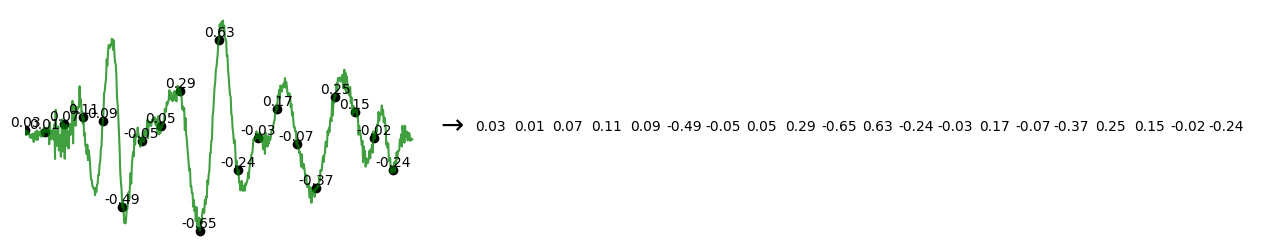</img>

And by combining all the slices we have, we can represent our audio signal as a matrix. Thus, the rows of the matrix are precisely the short 1D arrays of slices we cut in the first place:


$$M = \begin{bmatrix}0.03 &  0.01 & -0.01 &  0.02 &  0. & \ldots \\
-0.1  & -0.08 & -0.13 & -0.08 & -0.09 & \ldots \\
-0.06 & -0.07 & -0.04 & -0.03 & -0.05 & \ldots \\
-0.   &  0.01 & -0.02 &  0.   &  0.   & \ldots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots
\end{bmatrix}$$

The idea of SVD is to decompose a matrix $M$ into a product of three matrices:

$$M = U\Sigma V^T$$

where $U$ and $V$ are orthogonal matrices, and $\Sigma$ is a diagonal matrix. Without going into too much details, SVD decomposes a matrix into principal directions ($U$), and measures how strong the matrix acts on these directions ($\Sigma$). The product $U\Sigma$ describes the most important components of the matrix, that capture the most of the variance of the data.

If we truncate these matrices to only $n$ components, we get a lower-dimensional approximation of the original matrix. And that's it. That's how we find the samples (represented as the truncated matrix $U\Sigma$) with their coefficients ($V^T$).